<h1 style="text-align:  center;">Введение в анализ данных</h1>

<h1 style="text-align:center;">LAB3</h1>

Подключаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

In [ ]:
cancer_df = pd.read_csv('3cancer.csv', sep=',')

In [5]:
print('\n', "Редактирование ошибок: В процессе", '\n')


 Редактирование ошибок: В процессе 



In [4]:
for column in cancer_df.columns:
    print('Уникальные значения поля', column, ': ', cancer_df[column].unique())

cancer_df['bare_nucleoli'] = cancer_df['bare_nucleoli'].replace({'?': None})
cancer_df = cancer_df.dropna()
cancer_df['bare_nucleoli'] = cancer_df['bare_nucleoli'].astype('int64')

cancer_df = cancer_df.drop_duplicates(subset=['id'])
cancer_df = cancer_df.drop_duplicates(
    subset=['clump_thickness', "size_uniformity", "shape_uniformity", "marginal_adhesion", "epithelial_size",
            "bare_nucleoli", "bland_chromatin", "normal_nucleoli", "mitoses", "class"])

cancer_df.reset_index(drop=True, inplace=True)

print(cancer_df.info())

Уникальные значения поля id :  [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1059552  1065726
  1066373  1066979  1070935  1071760  1072179  1074610  1075123  1080185
  1081791  1084584  1091262  1099510  1100524  1102573  1103608  1103722
  1105257  1105524  1106829  1108370  1108449  1110102  1110503  1110524
  1111249  1112209  1113038  1113483  1113906  1115282  1115293  1116116
  1116132  1116998  1118039  1120559  1121732  1121919  1123061  1124651
  1125035  1126417  1131294  1132347  1133041  1133136  1136142  1137156
  1143978  1147044  1147699  1147748  1148278  1148873  1155546  1156948
  1165297  1165926  1166630  1166654  1167439  1167471  1168359  1168736
  1169049  1170419  1170420  1171710  1171795  1171845  1172152  1173216
  1173235  1173347  1173509  1173514  1173681  1174057  1174131  1174428
  1175937  1176881  

In [6]:
print('\n', "Редактирование ошибок: Завершено", '\n')


 Редактирование ошибок: Завершено 



Будем проводить анализ без поля id, так как он не несет смысловой нагрузки для анализа

In [36]:
old_cancer_df = cancer_df
cancer_df = cancer_df.drop(columns = ['id'])

In [37]:
cancer_df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


<h1 style="text-align:center;">Иерархический агломеративный метод</h1>

Импортируем модуль sklearn

In [38]:
from sklearn.preprocessing import StandardScaler

Создаем объект класса scaler. Обучаем стандартизатор и преобразуем набор данных

In [39]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(cancer_df)

Импортируем из модуля для иерархической кластеризации hierarhy, классы модели linkage и dendrogram

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Создаем таблицу связок между объектами

In [41]:
linked = linkage(df_sc, method="ward")

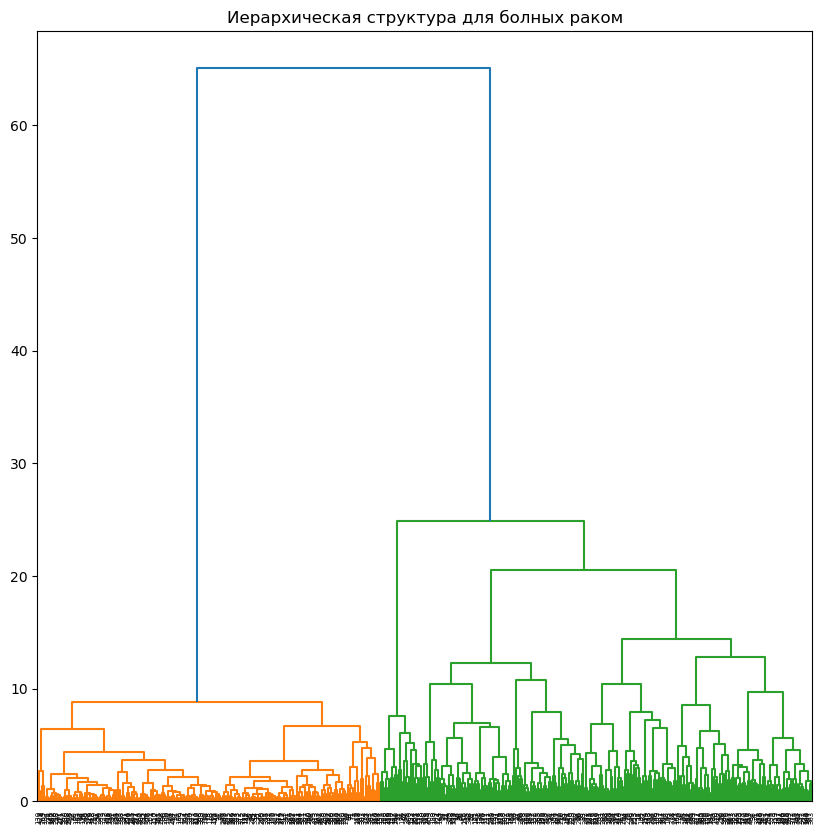

In [42]:
plt.figure(figsize=(10,10))
dendrogram(linked, orientation="top")
plt.title("Иерархическая структура для болных раком")
plt.show()

Разделим данные на 2 кластера с применением метода KMeans и метрики высчитанной для агломеративной иерархической кластеризации

In [43]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=0)
labels = km.fit_predict(df_sc)

Находим среднее значение параметров по кластерам

In [44]:
cancer_df.groupby(labels).mean()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,7.265487,6.650442,6.637168,5.730088,5.438053,7.703540,6.048673,6.004425,2.623894,3.964602
1,3.331683,1.524752,1.707921,1.643564,2.242574,1.653465,2.202970,1.490099,1.143564,2.079208


Метрика силуэта

In [45]:
from sklearn.metrics import silhouette_score
silhouette_score(df_sc, labels)

0.46402243843846597

Построим график важности характеристик

In [46]:
from sklearn.ensemble import RandomForestClassifier

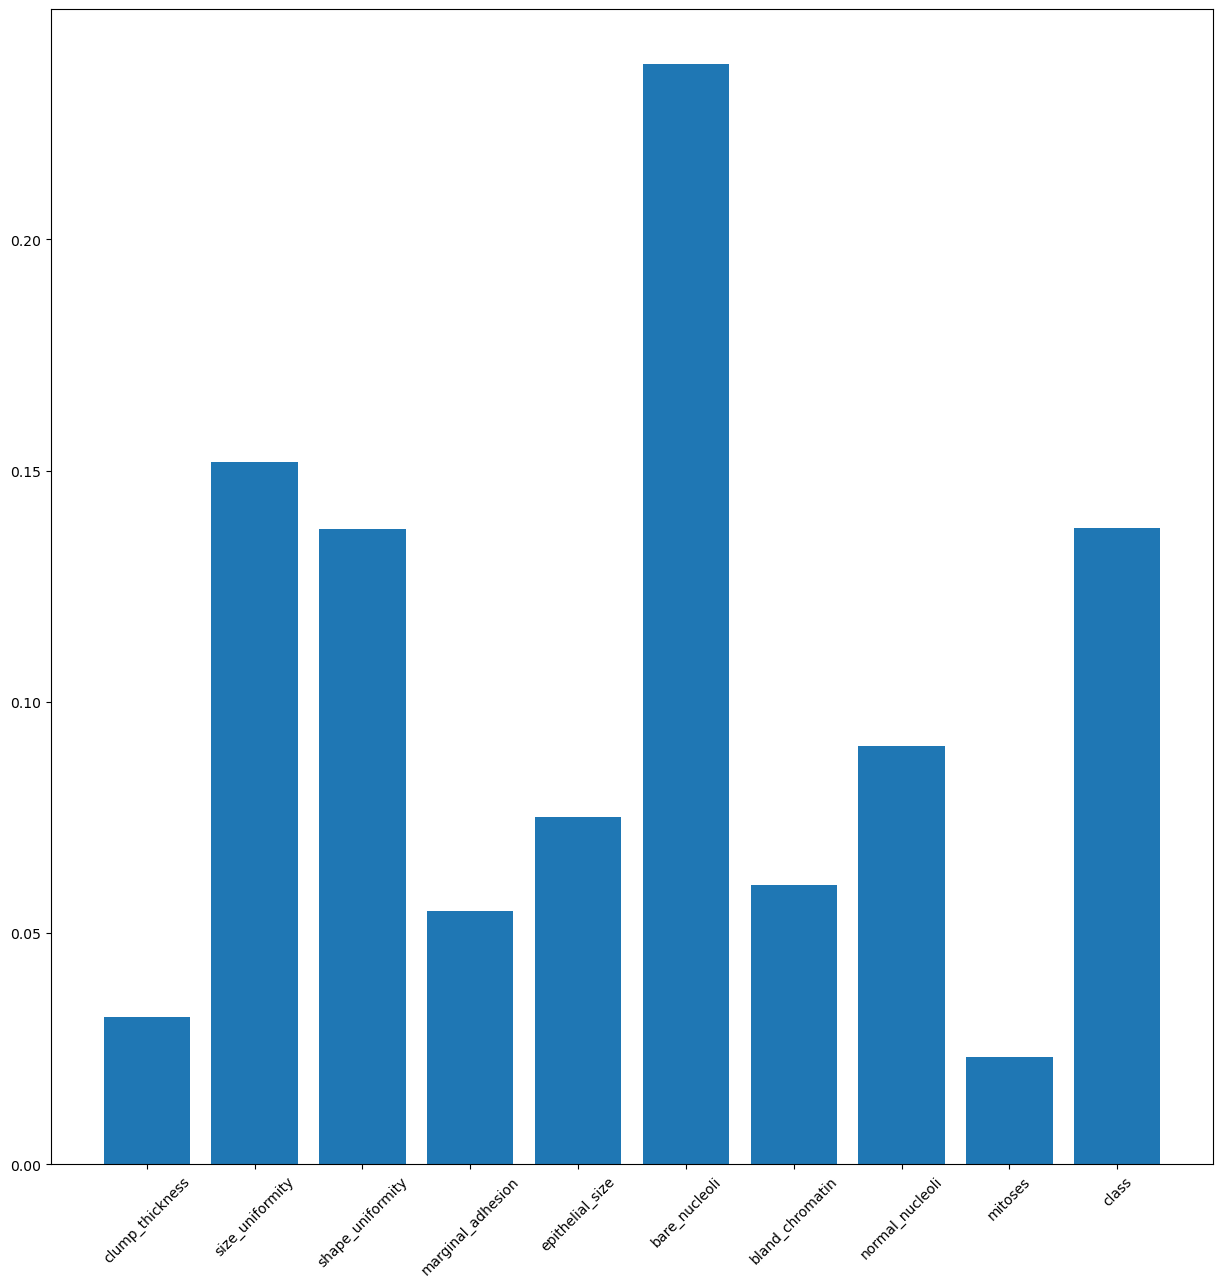

In [47]:
km2 = KMeans(4)
km2.fit(cancer_df)

clf = RandomForestClassifier()
clf.fit(cancer_df, km2.labels_)

plt.figure(figsize=(15, 15))
plt.bar(cancer_df.columns, height=clf.feature_importances_)
plt.xticks(rotation=45)

plt.show()

<h1 style="text-align:center;">Вывод</h1>
Изучил алгоритмы и методы кластерного анализа на
практике.